En este proyecto se utilizaron métodos de analisis ultilizando SQL + python, se realizaron análisis sobre compañias de taxis, viajes a ciertos barrios, duración de los viajes, entre otros.

## Paso 4. Análisis exploratorio de datos (Python) ##

In [15]:
#importo las librerias
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import seaborn as sns

**importar archivos**

In [16]:
 #Dataframe 1 
companyt= pd.read_csv('/datasets/project_sql_result_01.csv')
#cargo el df 2
chicagot = pd.read_csv('/datasets/project_sql_result_04.csv')
#cargo último archivo que utilizaré en el paso 5
airportravel = pd.read_csv('/datasets/project_sql_result_07.csv')


In [17]:
#Exlorando dataset 1
companyt.info()
companyt.sample(5, random_state = 64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
19,Chicago Medallion Leasing INC,1607
43,2809 - 95474 C & D Cab Co Inc.,29
53,5006 - 39261 Salifu Bawa,14
22,Chicago Independents,1296
41,Chicago Star Taxicab,29


In [18]:
companyt.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


En el primer archivo está la información de las compañias de taxis y el número de viajes que realizó cada vehículo los días 15-16 de noviembre del año 2017.
Hay dos columnas, un total de 64 entradas, no se observa que hayan valores faltantes.
Con el método describe() puedo analizar que la cantidad promedio de viajes realizados por cada empresa es aproximadamente 2145.48, hay una empresa que ha realizado 2 viajes y hay otra que esos dias realizó 19558.

In [19]:
#Explorando dataset 2
chicagot.info()
chicagot.sample(7, random_state = 94)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
13,Uptown,849.666667
87,Pullman,3.896552
5,Lake View,2420.966667
18,West Town,516.400000
26,Hyde Park,255.133333
35,Norwood Park,95.233333
23,Rogers Park,299.033333


In [20]:
chicagot.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


El segundo archivo posee información sobre los barrios de chicago donde finalizaron los viajes y el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
Este df tiene 2 columnas, 94 entradas, una columna con datos tipo object y la otra float64, no se observan valores nulos.
con el método describe() puedo ver que hay un total de 94 ubicaciones, cada ubicación en promedio tuvo 599 viajes, siendo el mínimo 1.8 y el máximo 10727.4.  

In [21]:
#Explorando dataset 3
airportravel.info()
airportravel.sample(10, random_state = 1068)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
61,2017-11-11 10:00:00,Good,1260.0
456,2017-11-04 13:00:00,Good,3394.0
760,2017-11-04 14:00:00,Good,3300.0
192,2017-11-18 08:00:00,Bad,1500.0
935,2017-11-04 07:00:00,Good,1538.0
491,2017-11-04 16:00:00,Bad,2280.0
59,2017-11-18 06:00:00,Good,2100.0
655,2017-11-04 08:00:00,Good,1260.0
100,2017-11-04 06:00:00,Good,1177.0
442,2017-11-11 08:00:00,Good,1205.0


In [22]:
airportravel.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Al analizarlo este posee 1068 entradas, 3 columnas, datos sobre viajes desde el barrio Loop hasta el Aeropuerto Internacional O'Hare, la fecha y hora, condiciones climáticas, duración de los viajes en segundos.
Con el método describe() puedo ver que el promedio de la duración de los viajes es de 2071 segundos, hubo un viaje que duró 0 segundos (probablemente cancelado), y el máximo 7440 segundos.

### Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

,company_name,trips_amount
45,Flash Cab,19558
61,Taxi Affiliation Services,11422
50,Medallion Leasing,10367
63,Yellow Cab,9888
60,Taxi Affiliation Service Yellow,9299
36,Chicago Carriage Cab Corp,9181
43,City Service,8448
59,Sun Taxi,7701
58,Star North Management LLC,7455
33,Blue Ribbon Taxi Association Inc.,5953


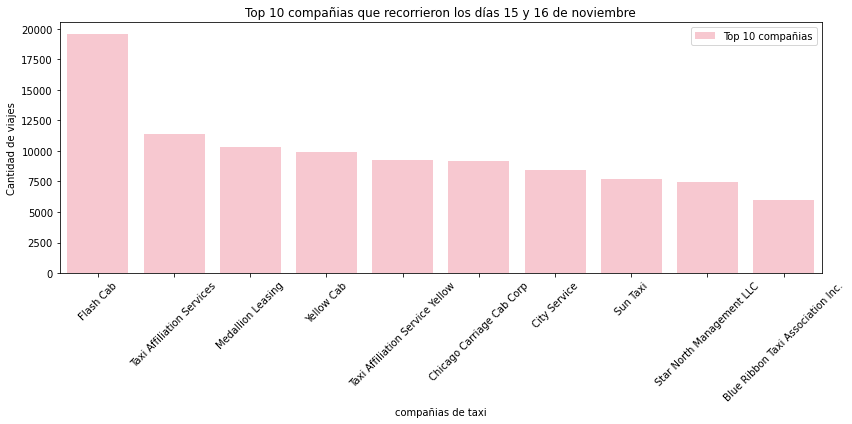

In [23]:
#Gráfico de compañias que realizaron más viajes los días 15 y 16
top_company = companyt.groupby('company_name')['trips_amount'].sum().reset_index() #agrupo el dataframe por compañias y el número de viajes, los sumo y reestablezco el índice
top_company = top_company.sort_values(by='trips_amount', ascending=False) #ordeno de forma descendente
top_c = top_company.head(10) #creo una varible que contiene el top 10 de compañias
display(top_c) #imprimo el top 10 de las compañias


#Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='company_name', y='trips_amount', data=top_c, color='pink', label='Top 10 compañias')
plt.title('Top 10 compañias que recorrieron los días 15 y 16 de noviembre')
plt.xlabel('compañias de taxi')
plt.ylabel('Cantidad de viajes')
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.tight_layout()
plt.show()

Investigando pude ver que los días 15-16 fueron miércoles y jueves, la empresa con más viajes fue Flash Cab con casi 20000 viajes, seguida otras 3 compañias que obtuvieron menos viajes y fueron mas similares la cantidad de viajes que realizaron (Entre 12000 y 10000), el resto de compañias tuvieron menos de 10000 viajes.
Con esto se puede ver que la compañía Flash Cab es más popular, puede deberse a que las personas la encuentran más confiable, puede ser que tenga más publicidad o mejor marketing, entre otros, pero es necesario más información.

### Identificar los 10 principales barrios en términos de finalización del recorrido

,dropoff_location_name,average_trips
50,Loop,10727.466667
68,River North,9523.666667
78,Streeterville,6664.666667
87,West Loop,5163.666667
63,O'Hare,2546.900000
44,Lake View,2420.966667
35,Grant Park,2068.533333
56,Museum Campus,1510.000000
32,Gold Coast,1364.233333
74,Sheffield & DePaul,1259.766667


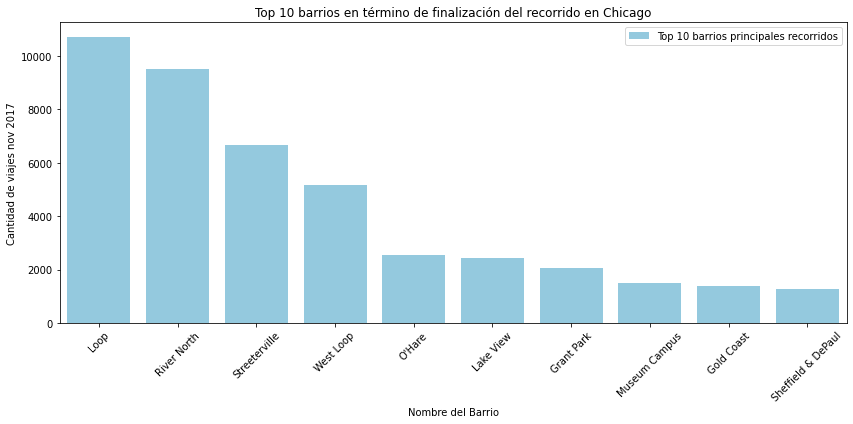

In [24]:
# Top 10 barrios de chicago donde recorrieron los vehiculos
top_10_t = chicagot.groupby('dropoff_location_name')['average_trips'].sum().reset_index() # Agrupo por viajes y promedio de viajes
top_10_t = top_10_t.sort_values(by='average_trips', ascending=False) #Ordeno de forma descendente
top_10 = top_10_t.head(10) 
display(top_10)


# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10, color='skyblue', label='Top 10 barrios principales recorridos')
plt.title('Top 10 barrios en término de finalización del recorrido en Chicago')
plt.xlabel('Nombre del Barrio')
plt.ylabel('Cantidad de viajes nov 2017')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

El top 4 de barrios recorridos son: Loop (la más popular Loop con más de 10000 viajes, es un área comunitaria del distrito financiero de Chicago), River North (con tiendas y restaurantes de lujo, elegantes clubes nocturnos y bares de cócteles), StreetVille y West Loop.
La calle O'hare y Lake View tienen viajes similares con cerca de 2500 viajes aprox, el resto de calles tuvieron entre 1000 y 2000 viajes.

### Paso 5. Prueba de hipótesis (Python) #


In [25]:
airportravel['start_ts'] = pd.to_datetime(airportravel['start_ts']) 
display(airportravel['start_ts']) # Convierto start_ts a formato fecha y hora con to_datetime

print('Dias Sábados')
airportravel['saturday'] = airportravel['start_ts'].dt.weekday == 5
display(airportravel['saturday']) # Agrego una columna donde estaran todos los sabados y la imprimo


print('Duración de los recorridos en minutos')
airportravel['duration_minutes'] = airportravel['duration_seconds']/60
display(airportravel['duration_minutes']) #Paso los segundos a minutos


0      2017-11-25 16:00:00
1      2017-11-25 14:00:00
2      2017-11-25 12:00:00
3      2017-11-04 10:00:00
4      2017-11-11 07:00:00
               ...        
1063   2017-11-25 11:00:00
1064   2017-11-11 10:00:00
1065   2017-11-11 13:00:00
1066   2017-11-11 08:00:00
1067   2017-11-04 16:00:00
Name: start_ts, Length: 1068, dtype: datetime64[ns]

Dias Sábados


0       True
1       True
2       True
3       True
4       True
        ... 
1063    True
1064    True
1065    True
1066    True
1067    True
Name: saturday, Length: 1068, dtype: bool

Duración de los recorridos en minutos


0       40.166667
1       32.000000
2       25.716667
3       41.866667
4       24.000000
          ...    
1063     0.000000
1064    21.966667
1065    35.000000
1066    23.000000
1067    47.233333
Name: duration_minutes, Length: 1068, dtype: float64

In [26]:
# H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma los sábados lluviosos

# H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

bad_cond = airportravel.loc[(airportravel['saturday'] == True) & (airportravel['weather_conditions'] == 'Bad'), 'duration_minutes']
good_cond = airportravel.loc[(airportravel['saturday'] == True) & (airportravel['weather_conditions'] == 'Good'), 'duration_minutes']

alpha = 0.04
results = st.ttest_ind(bad_cond, good_cond, equal_var=False, nan_policy = 'omit')

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')


Valor p: 6.738994326109026e-12
Rechazamos la hipótesis nula


Para la realización de esta hipótesis primero establecí mis hipótesis, cree las variables bad_cond y good_cond que tendrían los días sábados con mal clima y sábados con buen clima, filtre con las condiciones sábados y condición del clima que buscaba, más los minutos que duraron los recorridos.
Luego, utilizando la función st.ttest_ind para probar las hipótesis. Establecí un alpha de 0.04 porque quería ser un poco más rigurosa en ves de dejarlo en 0.05.
